# Healthcare Dataset Analysis – Complete EDA & Preprocessing Notebook

## 1. Import Libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

sns.set(style="whitegrid")
plt.style.use("default")

## 2. Load Healthcare Dataset

In [51]:
# Update path for Kaggle environment
data_path = "healthcare_dataset.csv"



In [52]:
df = pd.read_csv(data_path)
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [53]:
print(df.shape)

(55500, 15)


## 3. Statistical Analysis

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [55]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [56]:
df.describe(include='object')

,Name,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
count,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500
unique,49992,2,8,6,1827,40341,39876,5,3,1856,5,3
top,DAvId muNoZ,Male,A-,Arthritis,2024-03-16,Michael Smith,LLC Smith,Cigna,Elective,2020-03-15,Lipitor,Abnormal
freq,3,27774,6969,9308,50,27,44,11249,18655,53,11140,18627


## 4. Missing Values Handling

In [57]:
df.isnull().sum()

df_clean = df.copy()

num_cols = df_clean.select_dtypes(include=[np.number]).columns
cat_cols = df_clean.select_dtypes(exclude=[np.number]).columns

for col in num_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

for col in cat_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode().iloc[0])

df_clean.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

## 5. Handling Duplicates

In [58]:
print('Duplicates:', df_clean.duplicated().sum())
df_clean = df_clean.drop_duplicates().reset_index(drop=True)

Duplicates: 534


## 6. Handling Outliers (IQR)

In [59]:
def remove_iqr(df, cols):
    out = df.copy()
    for col in cols:
        Q1, Q3 = out[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        low, high = Q1 - 1.5*IQR, Q3 + 1.5*IQR
        out = out[(out[col] >= low) & (out[col] <= high)]
    return out

df_no_outliers = remove_iqr(df_clean, num_cols)
df_no_outliers.shape

(54966, 15)

## 7. Visual Analysis (Charts)

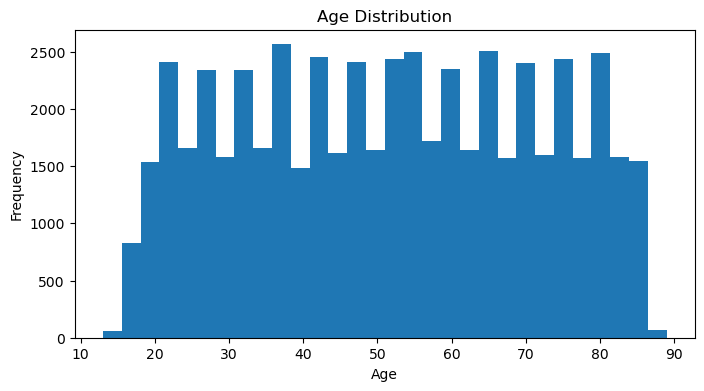

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.hist(df_clean['Age'].dropna(), bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


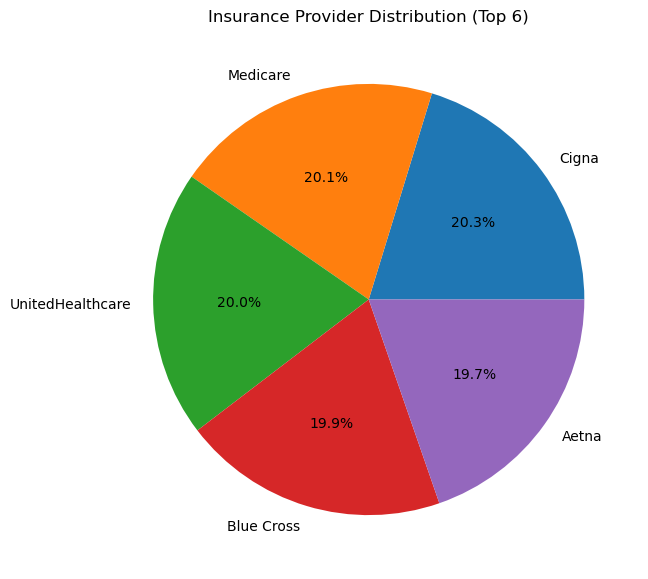

In [61]:
import matplotlib.pyplot as plt

ins_counts = df_clean['Insurance Provider'].value_counts().head(6)

plt.figure(figsize=(7,7))
plt.pie(ins_counts.values, labels=ins_counts.index.astype(str), autopct='%1.1f%%')
plt.title("Insurance Provider Distribution (Top 6)")
plt.show()


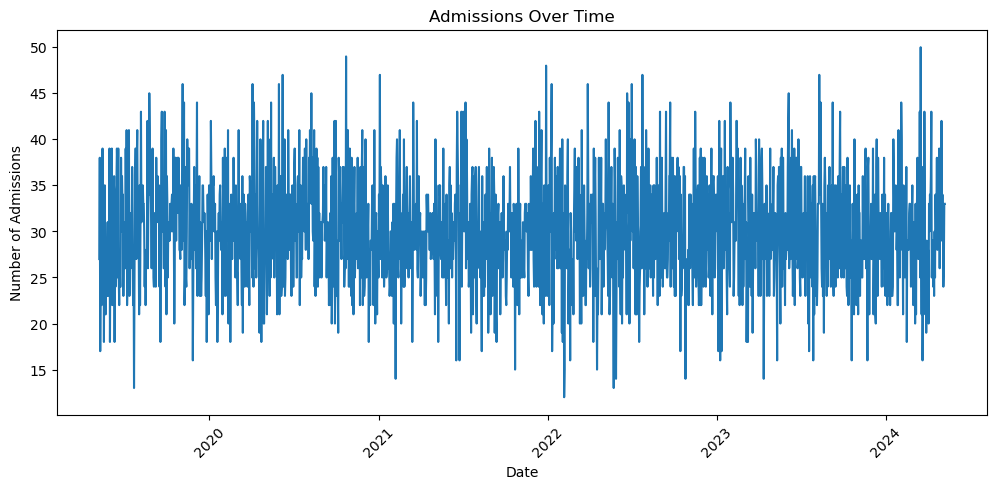

In [62]:
df_date = df_clean.copy()
df_date['Date of Admission'] = pd.to_datetime(df_date['Date of Admission'], errors='coerce')

admissions_by_date = df_date['Date of Admission'].value_counts().sort_index()

plt.figure(figsize=(12,5))
plt.plot(admissions_by_date.index, admissions_by_date.values)
plt.title("Admissions Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Admissions")
plt.xticks(rotation=45)
plt.show()

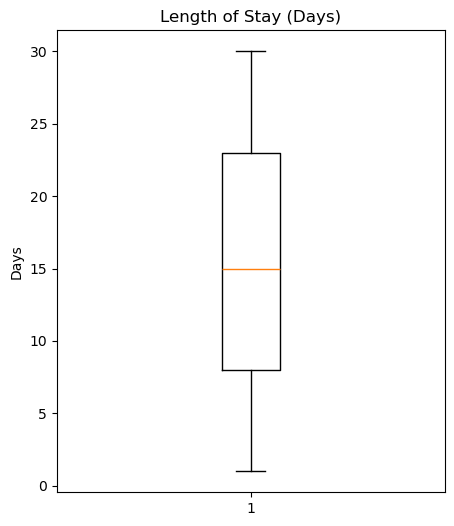

In [63]:
# Create Length_of_Stay if not present
if 'Length_of_Stay' not in df_clean.columns:
    df_temp = df_clean.copy()
    df_temp['Date of Admission'] = pd.to_datetime(df_temp['Date of Admission'], errors='coerce')
    df_temp['Discharge Date'] = pd.to_datetime(df_temp['Discharge Date'], errors='coerce')
    df_temp['Length_of_Stay'] = (df_temp['Discharge Date'] - df_temp['Date of Admission']).dt.days
else:
    df_temp = df_clean.copy()

plt.figure(figsize=(5,6))
plt.boxplot(df_temp['Length_of_Stay'].dropna())
plt.title("Length of Stay (Days)")
plt.ylabel("Days")
plt.show()



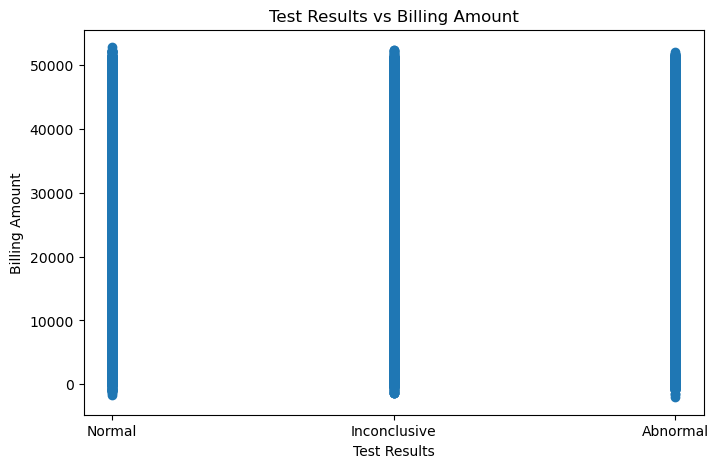

In [64]:
plt.figure(figsize=(8,5))
plt.scatter(df_clean['Test Results'], df_clean['Billing Amount'])
plt.title("Test Results vs Billing Amount")
plt.xlabel("Test Results")
plt.ylabel("Billing Amount")
plt.show()

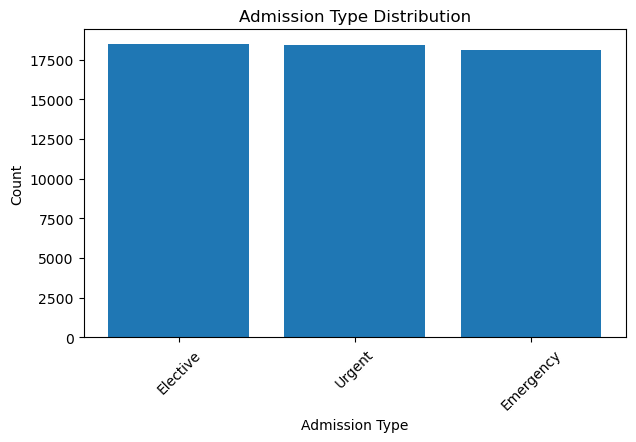

In [65]:
plt.figure(figsize=(7,4))
admission_counts = df_clean['Admission Type'].value_counts()

plt.bar(admission_counts.index.astype(str), admission_counts.values)
plt.title("Admission Type Distribution")
plt.xlabel("Admission Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## 8. Skewness & Kurtosis

In [66]:
viz[num_cols].skew(), viz[num_cols].kurt()

(Age              -0.005678
 Billing Amount   -0.001304
 Room Number      -0.011157
 dtype: float64,
 Age              -1.186082
 Billing Amount   -1.190254
 Room Number      -1.193452
 dtype: float64)

## 9. Encoding Categorical Variables

In [67]:
from sklearn.preprocessing import LabelEncoder

df_enc = df_no_outliers.copy()

# Strip spaces in case of extra whitespace
df_enc.columns = df_enc.columns.str.strip()

# 1. Label encode target variable
label_encoder = LabelEncoder()
df_enc['Medical_Condition_Label'] = label_encoder.fit_transform(df_enc['Medical Condition'])

# 2. One-hot encode valid categorical columns
onehot_cols = ['Gender', 'Blood Type', 'Insurance Provider', 'Admission Type']

# Only keep columns that actually exist in dataframe
onehot_cols = [c for c in onehot_cols if c in df_enc.columns]

df_enc = pd.get_dummies(df_enc, columns=onehot_cols, drop_first=True)

# 3. Drop columns you do NOT want in model (PII and text fields)
drop_cols = [
    'Name',
    'Doctor',
    'Hospital',
    'Room Number',
    'Medication',
    'Test Results',
    'Medical Condition',   # original target
    'Date of Admission',
    'Discharge Date'
]

drop_cols = [c for c in drop_cols if c in df_enc.columns]

df_enc = df_enc.drop(columns=drop_cols)

df_enc.head()


,Age,Billing Amount,Medical_Condition_Label,Gender_Male,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,Blood Type_O-,Insurance Provider_Blue Cross,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Admission Type_Emergency,Admission Type_Urgent
0,30,18856.281306,2,True,False,False,False,False,True,False,False,True,False,False,False,False,True
1,62,33643.327287,5,True,False,False,False,False,False,False,False,False,False,True,False,True,False
2,76,27955.096079,5,False,True,False,False,False,False,False,False,False,False,False,False,True,False
3,28,37909.782410,3,False,False,False,False,False,False,True,False,False,False,True,False,False,False
4,43,14238.317814,2,False,False,True,False,False,False,False,False,False,False,False,False,False,True


## 10. Feature Selection – SelectKBest

## 11. Scaling

In [68]:
from sklearn.feature_selection import SelectKBest, f_classif

# Separate features and target
X = df_enc.drop('Medical_Condition_Label', axis=1)
y = df_enc['Medical_Condition_Label']

# Keep only numeric columns for ANOVA F-test
X_numeric = X.select_dtypes(include=['int64','float64']).copy()

# Fill NA if any
X_numeric = X_numeric.fillna(X_numeric.median())

k = min(15, X_numeric.shape[1])
selector = SelectKBest(score_func=f_classif, k=k)
selector.fit(X_numeric, y)

selected_features = X_numeric.columns[selector.get_support()].tolist()
print("Selected features:", selected_features)


Selected features: ['Age', 'Billing Amount']


In [69]:
from sklearn.feature_selection import SelectKBest, f_classif

# Separate features and target
X = df_enc.drop('Medical_Condition_Label', axis=1)
y = df_enc['Medical_Condition_Label']

# Keep ONLY numeric columns for ANOVA F-test
X_numeric = X.select_dtypes(include=['float64', 'int64']).copy()

# Fill NaN values (required)
X_numeric = X_numeric.fillna(X_numeric.median())

# Select top K
k = min(15, X_numeric.shape[1])
selector = SelectKBest(score_func=f_classif, k=k)
selector.fit(X_numeric, y)

selected = X_numeric.columns[selector.get_support()].tolist()

print("Selected features:", selected)


Selected features: ['Age', 'Billing Amount']


## 12. Train-Test Split

In [70]:
# Select the chosen feature columns
X_selected = X_numeric[selected].copy()

# Scale them
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

print("Scaling done. Shape:", X_scaled.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Scaling done. Shape: (54966, 2)
Train shape: (43972, 2)
Test shape: (10994, 2)
